In [1]:
import plotly
import GPy

import subprocess, os, csv, signal, pysam, collections, optparse, sys, tempfile, re, optparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import rpy2.interactive as r
import rpy2.interactive.packages # this can take few seconds
import time
#from ZIFA import ZIFA
#from ZIFA import block_ZIFA
import pylab

warning in stationary: failed to import cython module: falling back to numpy


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
molecules <- read.table("/home/baker/Rna-seq_Data-Analysis/Pawel_Pascaz_Bacteria_High_MOI/Spike_in_sample_data/molecules.txt", header = TRUE,
                    stringsAsFactors = FALSE)


In [4]:
%%R -o ercc
ercc <- read.table("/home/baker/Rna-seq_Data-Analysis/Pawel_Pascaz_Bacteria_High_MOI/Spike_in_sample_data/ercc-info.txt", header = TRUE, sep = "\t",
                   stringsAsFactors = FALSE)
colnames(ercc) <- c("num", "id", "subgroup", "conc_mix1", "conc_mix2",
                    "expected_fc", "log2_mix1_mix2")
head(ercc)

  num         id subgroup conc_mix1  conc_mix2 expected_fc log2_mix1_mix2
1   1 ERCC-00130        A 30000.000 7500.00000           4              2
2   2 ERCC-00004        A  7500.000 1875.00000           4              2
3   3 ERCC-00136        A  1875.000  468.75000           4              2
4   4 ERCC-00108        A   937.500  234.37500           4              2
5   5 ERCC-00116        A   468.750  117.18750           4              2
6   6 ERCC-00092        A   234.375   58.59375           4              2


In [5]:
%%R -o ercc_rows_single
ercc_rows_single <- grep("ERCC", rownames(molecules))
head(ercc_rows_single)

[1] 18939 18940 18941 18942 18943 18944


In [6]:
%%R -o Genes_rows_single
Genes_rows_single <- grep("ENSG", rownames(molecules))
head(Genes_rows_single)

[1] 1 2 3 4 5 6


In [8]:
%%R -o gene_output
gene_output <- molecules[Genes_rows_single,]
head(gene_output)

                NA19098.r1.A01 NA19098.r1.A02 NA19098.r1.A03 NA19098.r1.A04
ENSG00000237683              0              0              0              1
ENSG00000187634              0              0              0              0
ENSG00000188976              3              6              1              3
ENSG00000187961              0              0              0              0
ENSG00000187583              0              0              0              0
ENSG00000187642              0              0              0              0
                NA19098.r1.A05 NA19098.r1.A06 NA19098.r1.A07 NA19098.r1.A08
ENSG00000237683              0              0              0              0
ENSG00000187634              0              0              0              0
ENSG00000188976              4              2              3              6
ENSG00000187961              0              0              0              0
ENSG00000187583              0              0              0              0
ENSG00000187

In [11]:
%%R -o ercc_input
ercc <- ercc[order(ercc$id), ]
# Also remove spike-ins with no counts
ercc_input <- ercc[ercc$id %in% rownames(molecules), ]
head(ercc_input)

   num         id subgroup    conc_mix1    conc_mix2 expected_fc log2_mix1_mix2
70  70 ERCC-00002        D 1.500000e+04 3.000000e+04        0.50          -1.00
72  72 ERCC-00003        D 9.375000e+02 1.875000e+03        0.50          -1.00
2    2 ERCC-00004        A 7.500000e+03 1.875000e+03        4.00           2.00
26  26 ERCC-00009        B 9.375000e+02 9.375000e+02        1.00           0.00
67  67 ERCC-00012        C 1.144409e-01 1.716614e-01        0.67          -0.58
86  86 ERCC-00013        D 9.155273e-01 1.831055e+00        0.50          -1.00


In [12]:
%%R -o ercc_output
ercc_output <- molecules[ercc_rows_single,]
head(ercc_output)
erccFile = write.csv(ercc_output, 'ERCC_form_literature.tsv')
head(ercc_output)

           NA19098.r1.A01 NA19098.r1.A02 NA19098.r1.A03 NA19098.r1.A04
ERCC-00002            189            187            159            168
ERCC-00003             21             23             20             23
ERCC-00004             51             78             51             78
ERCC-00009             12             13              7              5
ERCC-00012              0              0              0              0
ERCC-00013              0              0              0              0
           NA19098.r1.A05 NA19098.r1.A06 NA19098.r1.A07 NA19098.r1.A08
ERCC-00002            196            184            201            184
ERCC-00003             23             14              6             20
ERCC-00004             65             53             64             58
ERCC-00009              7             11             13              9
ERCC-00012              0              0              0              0
ERCC-00013              0              0              0              0
      

In [13]:
X = np.matrix(ercc_input)
Y = np.matrix(ercc_output)

In [14]:
X.shape

(89, 7)

In [15]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [16]:
m = GPy.models.GPRegression(X[:,3],Y[:,1],kernel)

In [17]:
from IPython.display import display
display(m)

GP_regression.,Value,Constraint,Prior,Tied to
rbf.variance,1.0,+ve,,
rbf.lengthscale,1.0,+ve,,
Gaussian_noise.variance,1.0,+ve,,


{'dataplot': {'dataplot': [<matplotlib.lines.Line2D at 0x7fbb0b545790>]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x7fbb0b52be50>],
  [<matplotlib.lines.Line2D at 0x7fbb0b537c90>]]}

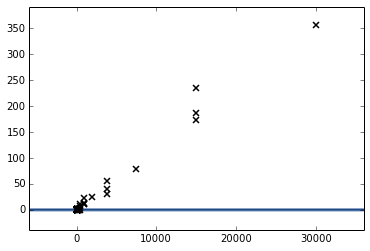

In [18]:
m.plot()

In [19]:
m.optimize_restarts(num_restarts = 20)

Optimization restart 1/20, f = 295.126846429
Optimization restart 2/20, f = 295.126866159
Optimization restart 3/20, f = 295.127442946
Optimization restart 4/20, f = 295.196807149
Optimization restart 5/20, f = 294.516112077
Optimization restart 6/20, f = 295.127181878
Optimization restart 7/20, f = 295.12684643
Optimization restart 8/20, f = 295.126868104
Optimization restart 9/20, f = 294.506367524
Optimization restart 10/20, f = 294.506155208
Optimization restart 11/20, f = 294.506833122
Optimization restart 12/20, f = 295.126846716
Optimization restart 13/20, f = 294.507387396
Optimization restart 14/20, f = 294.506920827
Optimization restart 15/20, f = 294.508306647
Optimization restart 16/20, f = 294.506155073
Optimization restart 17/20, f = 294.506154965
Optimization restart 18/20, f = 295.132946453
Optimization restart 19/20, f = 295.126846429
Optimization restart 20/20, f = 294.506154964


In [27]:
display(m)

GP_regression.,Value,Constraint,Prior,Tied to
rbf.variance,52378.472842,+ve,,
rbf.lengthscale,26940.3099745,+ve,,
Gaussian_noise.variance,32.7730173368,+ve,,


{'dataplot': {'dataplot': [<matplotlib.lines.Line2D at 0x7fbb0b562410>]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x7fbb09c6ead0>],
  [<matplotlib.lines.Line2D at 0x7fbb0b556910>]]}

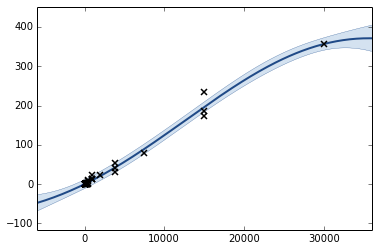

In [20]:
m.plot()

In [48]:
AllGeneReads = np.matrix(gene_output)
C01 = np.asarray(AllGeneReads[:,1])

In [49]:
type(C01)

numpy.ndarray

In [50]:
help(m.predict)

Help on method predict in module GPy.core.gp:

predict(self, Xnew, full_cov=False, Y_metadata=None, kern=None) method of GPy.models.gp_regression.GPRegression instance
    Predict the function(s) at the new point(s) Xnew.
    
    :param Xnew: The points at which to make a prediction
    :type Xnew: np.ndarray (Nnew x self.input_dim)
    :param full_cov: whether to return the full covariance matrix, or just
                     the diagonal
    :type full_cov: bool
    :param Y_metadata: metadata about the predicting point to pass to the likelihood
    :param kern: The kernel to use for prediction (defaults to the model
                 kern). this is useful for examining e.g. subprocesses.
    :returns: (mean, var):
        mean: posterior mean, a Numpy array, Nnew x self.input_dim
        var: posterior variance, a Numpy array, Nnew x 1 if full_cov=False, Nnew x Nnew otherwise
    
       If full_cov and self.input_dim > 1, the return shape of var is Nnew x Nnew x self.input_dim. If 

In [77]:
[mu, C] = m.predict(C01)

In [97]:
C01[0:20,0]
#mu.item(0)

array([0, 6, 0, 0, 0, 0, 7, 3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0], dtype=int32)

In [99]:
mu[0:20,0]

array([ 0.21750527,  0.21750527,  0.27710616,  0.21750527,  0.21750527,
        0.21750527,  0.21750527,  0.28704179,  0.24730295,  0.21750527,
        0.21750527,  0.21750527,  0.21750527,  0.21750527,  0.23736978,
        0.21750527,  0.21750527,  0.24730295,  0.21750527,  0.21750527])

We now change the orientation. We now consider the ercc_spike in inputs to be our output and the outputs to be input

In [101]:
mRev = GPy.models.GPRegression(Y[:,1],X[:,3],kernel)

{'dataplot': {'dataplot': [<matplotlib.lines.Line2D at 0x7fbb097c6810>]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x7fbb0979aed0>],
  [<matplotlib.lines.Line2D at 0x7fbb097b5d10>]]}

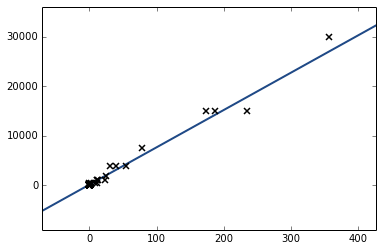

In [103]:
mRev.plot()

In [105]:
mRev.optimize_restarts(num_restarts = 40)

Optimization restart 1/40, f = 582.720084134
Optimization restart 2/40, f = 632.735809981
Optimization restart 3/40, f = 639.948377679
Optimization restart 4/40, f = 652.866055752
Optimization restart 5/40, f = 601.529081988
Optimization restart 6/40, f = 806.932029284
Optimization restart 7/40, f = 688.675149646
Optimization restart 8/40, f = 675.162336779
Optimization restart 9/40, f = 717.397136016
Optimization restart 10/40, f = 834.168541603
Optimization restart 11/40, f = 815.70950489
Optimization restart 12/40, f = 677.402703142
Optimization restart 13/40, f = 804.882846546
Optimization restart 14/40, f = 818.098162919
Optimization restart 15/40, f = 831.989387362
Optimization restart 16/40, f = 725.966587843
Optimization restart 17/40, f = 599.679683947
Optimization restart 18/40, f = 652.902064274
Optimization restart 19/40, f = 724.763217194
Optimization restart 20/40, f = 599.376151515
Optimization restart 21/40, f = 843.997865107
Optimization restart 22/40, f = 710.56209351

{'dataplot': {'dataplot': [<matplotlib.lines.Line2D at 0x7fbb096d3210>]},
 'gpplot': [[<matplotlib.lines.Line2D at 0x7fbb095168d0>],
  [<matplotlib.lines.Line2D at 0x7fbb09527710>]]}

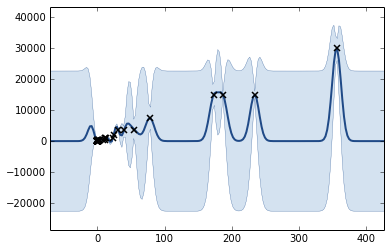

In [106]:
mRev.plot()

In [107]:
[muRev, CRev] = mRev.predict(C01)

In [109]:
C01[0:20,0]

array([0, 0, 6, 0, 0, 0, 0, 7, 3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0], dtype=int32)

In [108]:
muRev[0:20,0]

array([  24.60926079,   24.60926079,  604.71824703,   24.60926079,
         24.60926079,   24.60926079,   24.60926079,  525.0798924 ,
        415.83677859,   24.60926079,   24.60926079,   24.60926079,
         24.60926079,   24.60926079,  227.15786857,   24.60926079,
         24.60926079,  415.83677859,   24.60926079,   24.60926079])